# Load Data and Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

df_listings_bos = pd.read_csv('./boston/listings.csv')
df_calendar_bos = pd.read_csv('./boston/calendar.csv')
df_review_bos = pd.read_csv('./boston/reviews.csv')

# df_listings_sea = pd.read_csv('./seattle/listings.csv')
# df_calendar_sea = pd.read_csv('./seattle/calendar.csv')
# df_review_sea = pd.read_csv('./seattle/reviews.csv')

In [3]:
df_listings_bos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3585 non-null   int64  
 1   listing_url                       3585 non-null   object 
 2   scrape_id                         3585 non-null   int64  
 3   last_scraped                      3585 non-null   object 
 4   name                              3585 non-null   object 
 5   summary                           3442 non-null   object 
 6   space                             2528 non-null   object 
 7   description                       3585 non-null   object 
 8   experiences_offered               3585 non-null   object 
 9   neighborhood_overview             2170 non-null   object 
 10  notes                             1610 non-null   object 
 11  transit                           2295 non-null   object 
 12  access

In [4]:
def reformat_data(df):
    # Convert price string into float
    df.price = df.price.str.replace("[$, ]", "").astype("float")
    return df
df_listings_bos = reformat_data(df_listings_bos)

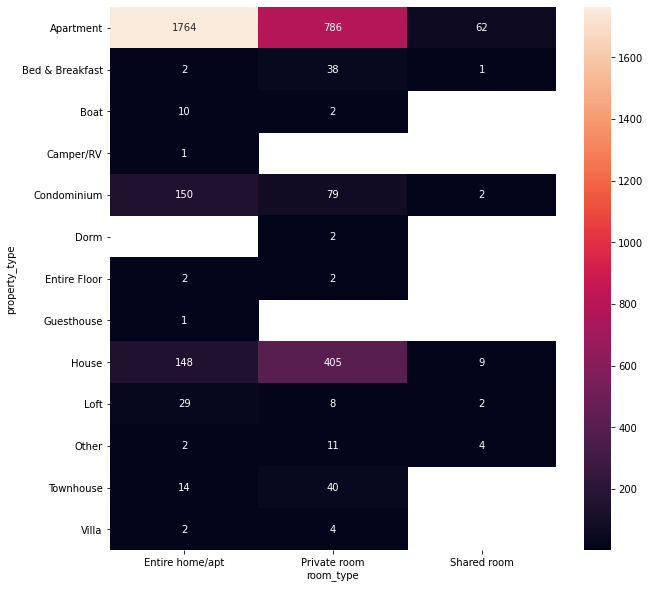

In [5]:
import seaborn as sns

plt.figure(figsize=(10,10))
ax = sns.heatmap(df_listings_bos.groupby(['property_type', 'room_type']).count()['listing_url'].unstack(), annot=True, fmt=".0f")

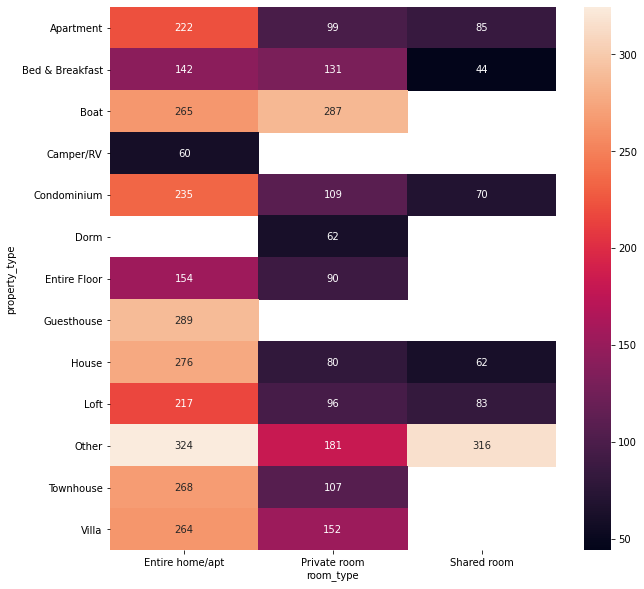

In [7]:
plt.figure(figsize=(10,10))
ax = sns.heatmap(df_listings_bos.groupby(['property_type', 'room_type']).mean()['price'].unstack(), annot=True, fmt=".0f")